# SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = '../Data/train_set.csv'
df = pd.read_csv(data)
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42)) 
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],              
    'svm__gamma': ['scale', 'auto', 0.1, 1], 
    'svm__kernel': ['rbf', 'linear']          
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy', 
    n_jobs=-1,        
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [3]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       271
         2.0       0.81      0.80      0.80        69

    accuracy                           0.92       340
   macro avg       0.88      0.87      0.88       340
weighted avg       0.92      0.92      0.92       340



Validation Accuracy: 0.9206


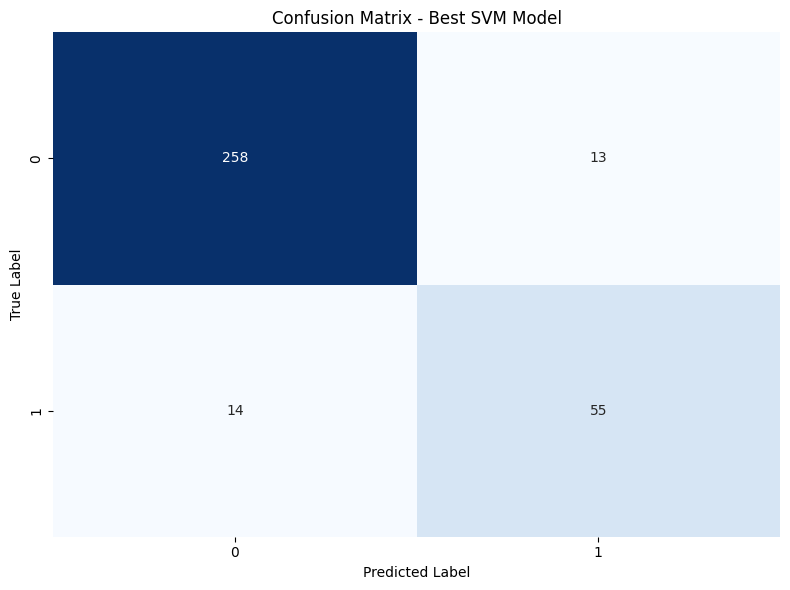

In [4]:
final_acc = accuracy_score(y_val, y_pred)
conf_mat = confusion_matrix(y_val, y_pred)

print(f"Validation Accuracy: {final_acc:.4f}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()